# Code script for the Working Session 
## Authors: Davier Hugues, Patti Federica & Timis Flavius
#### This document only presents the code script to answer to some questions of the working session. For their analysis and the answers to the entire working session. Please, refer to the LaTex report.

In [1]:
# Library 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.stats import linregress

### I- Bone Tissue Mechanics
#### Question a

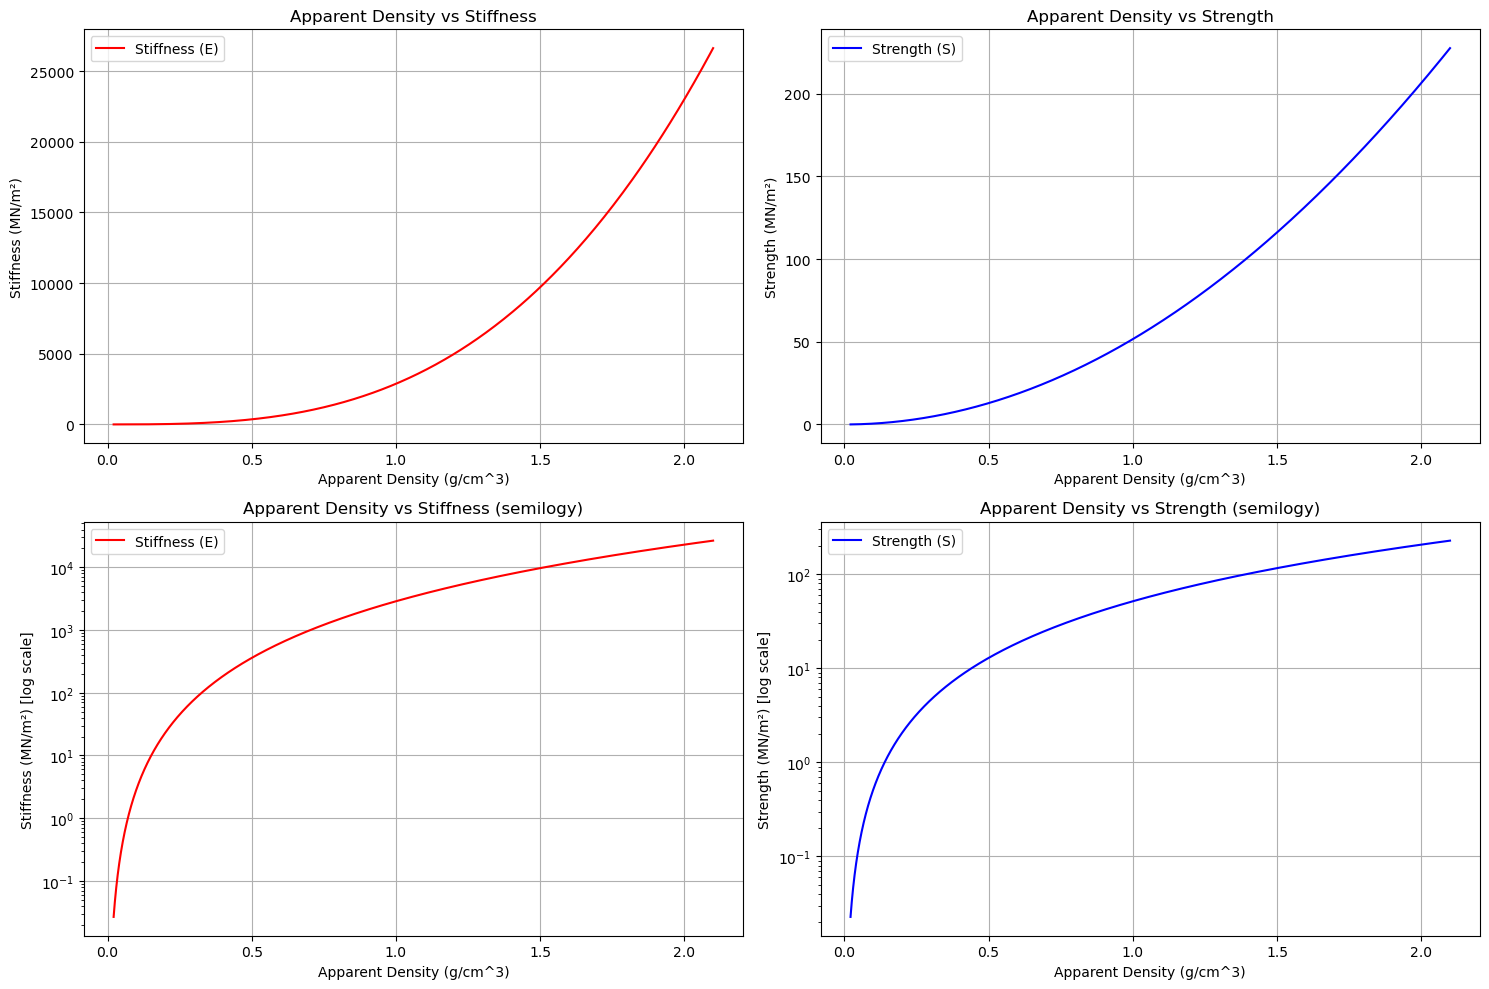

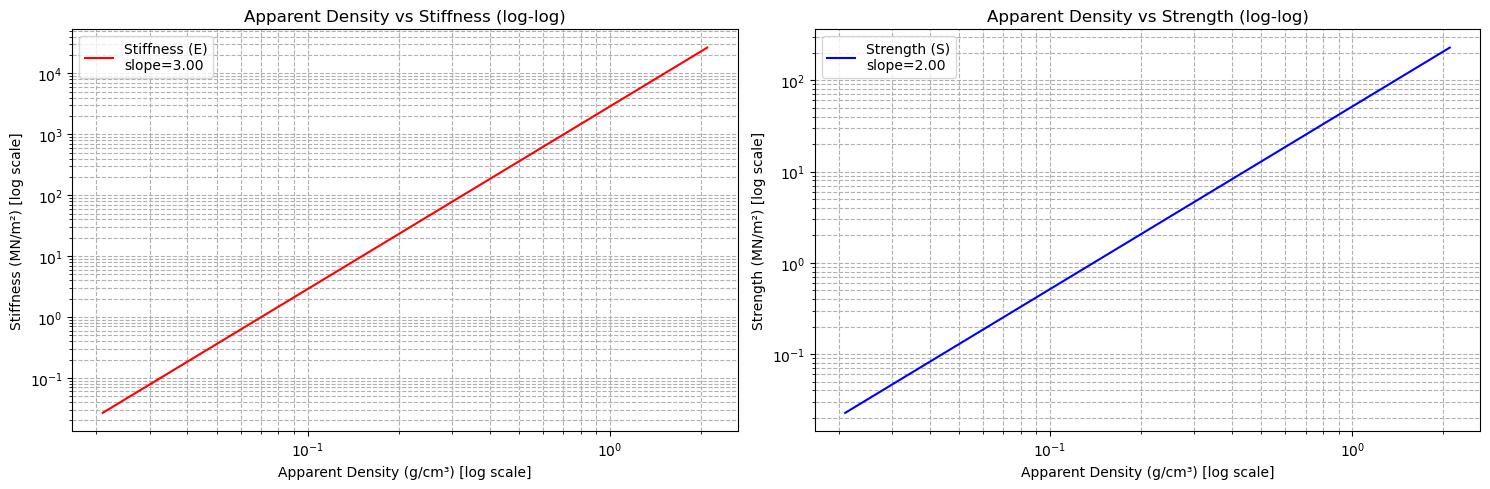

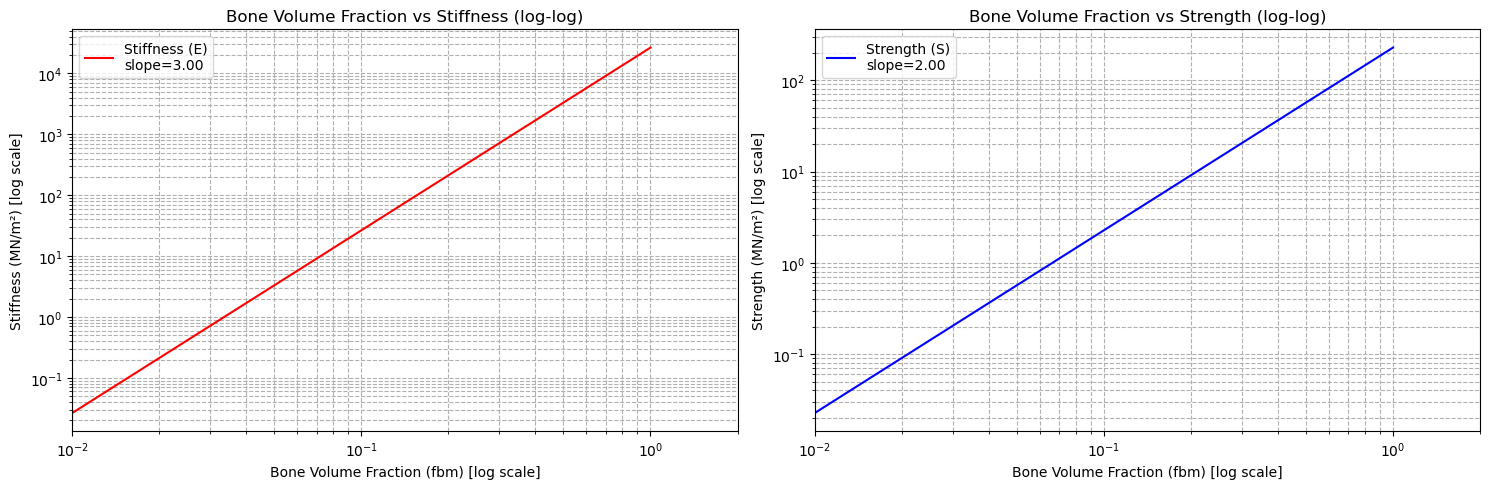

Slope of Stiffness (E) vs Bone Volume Fraction (fbm): 3.00
Slope of Strength (S) vs Bone Volume Fraction (fbm): 2.00
Slope of Stiffness (E) vs Apparent Density (rho): 3.00
Slope of Strength (S) vs Apparent Density (rho): 2.00


In [14]:
# Constants
# rho_c = 1.8                                       # apparent density of bone specimen (g/cm^3)
rho_c = 2.1                                         # g/cm^3, density of cortical bone (fbm=1.0)
strain_rate = 0.01                                  # quasi-static strain rate (s^-1)

# Bone volume fraction (fbm) values
fbm = np.logspace(-2, 0, 1000)                       # fbm from 0.01 to 1.0 (logarithmic spacing)
rho = fbm * rho_c                                   # Apparent density (g/cm^3)

# Calculate stiffness (E) and strength (S)
# E = S_c * (strain_rate ** 0.06) * (rho/rho_c)**2  # Stiffness (Compressive Modulus)
# S = S_c * (strain_rate ** 0.06) * (rho/rho_c)**2  # Strength (Compressive Strength) 
S = 68 * (strain_rate ** 0.06) * rho**2             # Strength (Compressive Strength)                                    
E = 3790 * (strain_rate ** 0.06) * rho**3           # Stiffness (Compressive Modulus)


# Function to compute the slope on a log-log scale
def compute_slope(x, y):
    log_x = np.log10(x)
    log_y = np.log10(y)
    slope, intercept, _, _, _ = linregress(log_x, log_y)
    return slope, intercept

# Compute slopes for log-log plots
slope_E_fbm, intercept_E_fbm = compute_slope(fbm, E)
slope_S_fbm, intercept_S_fbm = compute_slope(fbm, S)
slope_E_rho, intercept_E_rho = compute_slope(rho, E)
slope_S_rho, intercept_S_rho = compute_slope(rho, S)


# Plot apparent density vs stiffness
plt.figure(figsize=(15, 10))

# Standard plot
plt.subplot(2, 2, 1)
plt.plot(rho, E, label="Stiffness (E)", color="red")
plt.xlabel("Apparent Density (g/cm^3)")
plt.ylabel("Stiffness (MN/m²)")
plt.title("Apparent Density vs Stiffness")
plt.grid(True)
plt.legend()

# Semilogy plot
plt.subplot(2, 2, 3)
plt.semilogy(rho, E, label="Stiffness (E)", color="red")
plt.xlabel("Apparent Density (g/cm^3)")
plt.ylabel("Stiffness (MN/m²) [log scale]")
plt.title("Apparent Density vs Stiffness (semilogy)")
plt.grid(True)
plt.legend()

# Plot apparent density vs strength
# Standard plot
plt.subplot(2, 2, 2)
plt.plot(rho, S, label="Strength (S)", color="blue")
plt.xlabel("Apparent Density (g/cm^3)")
plt.ylabel("Strength (MN/m²)")
plt.title("Apparent Density vs Strength")
plt.grid(True)
plt.legend()

# Semilogy plot
plt.subplot(2, 2, 4)
plt.semilogy(rho, S, label="Strength (S)", color="blue")
plt.xlabel("Apparent Density (g/cm^3)")
plt.ylabel("Strength (MN/m²) [log scale]")
plt.title("Apparent Density vs Strength (semilogy)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Log-log plots: Apparent density (rho) vs stiffness (E)
plt.subplot(1, 2, 1)
plt.loglog(rho, E, label=f"Stiffness (E)\nslope={slope_E_rho:.2f}", color="red")
plt.xlabel("Apparent Density (g/cm³) [log scale]")
plt.ylabel("Stiffness (MN/m²) [log scale]")
plt.title("Apparent Density vs Stiffness (log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()

# Log-log plots: Apparent density (rho) vs strength (S)
plt.subplot(1, 2, 2)
plt.loglog(rho, S, label=f"Strength (S)\nslope={slope_S_rho:.2f}", color="blue")
plt.xlabel("Apparent Density (g/cm³) [log scale]")
plt.ylabel("Strength (MN/m²) [log scale]")
plt.title("Apparent Density vs Strength (log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

# Plot log-log for Bone Volume Fraction (fbm)
plt.figure(figsize=(15, 5))

# Adjust the x-axis limits for both subplots
x_min, x_max = 0.01, 2.0  # Example range, adjust as needed

# Log-log plots: Bone volume fraction (fbm) vs stiffness (E)
plt.subplot(1, 2, 1)
plt.loglog(fbm, E, label=f"Stiffness (E)\nslope={slope_E_fbm:.2f}", color="red")
plt.xlabel("Bone Volume Fraction (fbm) [log scale]")
plt.ylabel("Stiffness (MN/m²) [log scale]")
plt.title("Bone Volume Fraction vs Stiffness (log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.xlim(x_min, x_max)  # Set the x-axis limits for the first subplot

# Log-log plots: Bone volume fraction (fbm) vs strength (S)
plt.subplot(1, 2, 2)
plt.loglog(fbm, S, label=f"Strength (S)\nslope={slope_S_fbm:.2f}", color="blue")
plt.xlabel("Bone Volume Fraction (fbm) [log scale]")
plt.ylabel("Strength (MN/m²) [log scale]")
plt.title("Bone Volume Fraction vs Strength (log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.xlim(x_min, x_max)  # Set the x-axis limits for the second subplot

plt.tight_layout()
plt.show()


# Print slopes
print(f"Slope of Stiffness (E) vs Bone Volume Fraction (fbm): {slope_E_fbm:.2f}")
print(f"Slope of Strength (S) vs Bone Volume Fraction (fbm): {slope_S_fbm:.2f}")
print(f"Slope of Stiffness (E) vs Apparent Density (rho): {slope_E_rho:.2f}")
print(f"Slope of Strength (S) vs Apparent Density (rho): {slope_S_rho:.2f}")

### II- On Principle Stresses
#### Question a

In [19]:
# Function to display eigenvalues and eigenvectors in a readable format
def display_results(results):
    for case, (eigenvalues, eigenvectors) in results.items():
        print(f"\n{case}:")
        print("Eigenvalues (D):")
        print(np.round(eigenvalues, 3))
        print("Eigenvectors (V):")
        print(np.round(eigenvectors, 3))

# Define the stress tensors for cases A, B, and C
sigma_A = np.array([
    [10, 0, 0],
    [0, 20, 0],
    [0, 0, 100]
])

sigma_B = np.array([
    [10, 0, 0],
    [0, 200, 0],
    [0, 0, 100]
])

sigma_C = np.array([
    [0.19, -0.92, 0],
    [-0.92, -1.59, 0],
    [0, 0, 0.01]
])

# Function to compute sorted eigenvalues and eigenvectors
def compute_eigen_sorted(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    idx = eigenvalues.argsort()  # Sort indices based on eigenvalues
    return eigenvalues[idx], eigenvectors[:, idx]

# Compute for each case using the sorted function
eig_A = compute_eigen_sorted(sigma_A)
eig_B = compute_eigen_sorted(sigma_B)
eig_C = compute_eigen_sorted(sigma_C)

# Prepare results for display
results = {
    "Case A": eig_A,
    "Case B": eig_B,
    "Case C": eig_C
}

# Display the results for cases A, B, and C
display_results(results)



Case A:
Eigenvalues (D):
[ 10.  20. 100.]
Eigenvectors (V):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Case B:
Eigenvalues (D):
[ 10. 100. 200.]
Eigenvectors (V):
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

Case C:
Eigenvalues (D):
[-1.98  0.01  0.58]
Eigenvectors (V):
[[ 0.39   0.     0.921]
 [ 0.921  0.    -0.39 ]
 [ 0.     1.     0.   ]]


#### Question b 

In [21]:
import numpy as np

# Define the eigenvalues and eigenvectors (V and D) for each case (from previous results)
D_A = np.diag([10, 20, 100])
D_B = np.diag([10, 100, 200])
D_C = np.diag([-1.980, 0.010, 0.580])

V_A = np.eye(3)
V_B = np.array([
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0]
])
V_C = np.array([
    [0.39, 0.0, 0.921],
    [0.921, 0.0, -0.39],
    [0.0, 1.0, 0.0]
])

# Function to verify rotation properties and the relation between stress tensor and diagonal matrix
def verify_rotation_and_transformation(sigma, V, D, case_name):
    R = -V  # Rotation matrix (we take -V as given in the problem)
    
    # 1. Check if R is a rotation matrix: R * R^T = I_3 and det(R) = 1
    rotation_check = np.allclose(R @ R.T, np.eye(3))  # R * R^T should be identity matrix
    det_R = np.linalg.det(R)  # det(R) should be 1
    
    # 2. Check if the stress tensor relation holds: sigma * R = R * D
    transformation_check = np.allclose(sigma @ R, R @ D)  # sigma * R should equal R * D
    
    # Display results for this case
    print(f"Results for {case_name}:")
    
    print(f"\nRotation Matrix R (=-V):\n{R}")
    print(f"\nRotation Check (R * R^T = I_3): {rotation_check}")
    print(f"Determinant of R: {det_R}")
    print(f"\nTransformation Check (Sigma * R = R * D): {transformation_check}")
    print("-" * 50)
    
    return rotation_check, det_R, transformation_check

# Verify for each case and display the results
verify_rotation_and_transformation(sigma_A, V_A, D_A, "Case A")
verify_rotation_and_transformation(sigma_B, V_B, D_B, "Case B")
verify_rotation_and_transformation(sigma_C, V_C, D_C, "Case C")


Results for Case A:

Rotation Matrix R (=-V):
[[-1. -0. -0.]
 [-0. -1. -0.]
 [-0. -0. -1.]]

Rotation Check (R * R^T = I_3): True
Determinant of R: -1.0

Transformation Check (Sigma * R = R * D): True
--------------------------------------------------
Results for Case B:

Rotation Matrix R (=-V):
[[-1  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]

Rotation Check (R * R^T = I_3): True
Determinant of R: 1.0

Transformation Check (Sigma * R = R * D): True
--------------------------------------------------
Results for Case C:

Rotation Matrix R (=-V):
[[-0.39  -0.    -0.921]
 [-0.921 -0.     0.39 ]
 [-0.    -1.    -0.   ]]

Rotation Check (R * R^T = I_3): False
Determinant of R: -1.0003410000000001

Transformation Check (Sigma * R = R * D): False
--------------------------------------------------


(False, -1.0003410000000001, False)

#### Question C

In [91]:

# Function to compute Euler angles from rotation matrix R
def euler_angles_from_rotation_matrix(R):
    # Ensure R is a valid rotation matrix (should be orthogonal with det(R) = 1 or -1)
    #assert np.allclose(R @ R.T, np.eye(3)), "Matrix R is not orthogonal"
    det_R = np.linalg.det(R)
    #assert np.isclose(det_R, 1) or np.isclose(det_R, -1), "Matrix R has incorrect determinant"

    # Calculate the Euler angles
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2))  # theta
    roll = np.arctan2(R[1, 0], R[0, 0])  # phi
    yaw = np.arctan2(R[2, 1], R[2, 2])  # psi

    return roll, pitch, yaw

# Define rotation matrices for each case
R_A = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])
R_B = np.array([[-1, 0, 0], [0, 0, -1], [0, -1, 0]])
R_C = np.array([[-0.39, 0, -0.921], [-0.921, 0, 0.39], [0, -1, 0]])

# Compute Euler angles for each case
roll_A, pitch_A, yaw_A = euler_angles_from_rotation_matrix(R_A)
roll_B, pitch_B, yaw_B = euler_angles_from_rotation_matrix(R_B)
roll_C, pitch_C, yaw_C = euler_angles_from_rotation_matrix(R_C)

# Convert radians to degrees for easier interpretation
roll_A_deg, pitch_A_deg, yaw_A_deg = np.degrees([roll_A, pitch_A, yaw_A])
roll_B_deg, pitch_B_deg, yaw_B_deg = np.degrees([roll_B, pitch_B, yaw_B])
roll_C_deg, pitch_C_deg, yaw_C_deg = np.degrees([roll_C, pitch_C, yaw_C])

# Print the results
print(f"Case A Euler Angles (degrees): Roll = {roll_A_deg:.2f}, Pitch = {pitch_A_deg:.2f}, Yaw = {yaw_A_deg:.2f}")
print(f"Case B Euler Angles (degrees): Roll = {roll_B_deg:.2f}, Pitch = {pitch_B_deg:.2f}, Yaw = {yaw_B_deg:.2f}")
print(f"Case C Euler Angles (degrees): Roll = {roll_C_deg:.2f}, Pitch = {pitch_C_deg:.2f}, Yaw = {yaw_C_deg:.2f}")


Case A Euler Angles (degrees): Roll = 180.00, Pitch = 0.00, Yaw = 180.00
Case B Euler Angles (degrees): Roll = 180.00, Pitch = 0.00, Yaw = -90.00
Case C Euler Angles (degrees): Roll = -112.95, Pitch = -0.00, Yaw = -90.00


### III - Strain, Stress and Energy
#### Question a

In [39]:

# Définir la matrice des contraintes du cas C
sigma_C = np.array([[0.19, -0.92, 0],
                    [-0.92, -1.59, 0],
                    [0, 0, 0.01]])

# La contrainte moyenne vécue par l'os
epsilon_avg = 0.001  # 0.001 en microstrain

# Calculer les valeurs propres de la matrice des contraintes
eigenvalues, _ = np.linalg.eig(sigma_C)

# Trouver la contrainte principale maximale
sigma_max = np.max(eigenvalues)

# Calculer le module de Young effectif
E_eff = sigma_max / epsilon_avg

# Afficher le résultat
print(f"Valeur propre maximale (sigma_max): {sigma_max} MPa")
print(f"Module de Young effectif (E_eff): {E_eff} MPa")


Valeur propre maximale (sigma_max): 0.5800390619039717 MPa
Module de Young effectif (E_eff): 580.0390619039717 MPa


#### Question b

In [57]:
# Additional calculations for bone properties
sigma_max = 0.580  # Maximum principal stress in MPa
strain_rate = 0.01  # Strain rate in s^-1
rho_c = 2.1  # Density of compact bone in g/cm^3

# Calculate apparent density (rho_app)
rho_app = np.sqrt(sigma_max / (68 * strain_rate**0.06))

# Calculate bone volume fraction (f_bm)
f_bm = rho_app / rho_c

print(f"\nApparent Density (rho_app): {rho_app:.3f} g/cm^3")
print(f"Bone Volume Fraction (f_bm): {f_bm:.4f}")



Apparent Density (rho_app): 0.106 g/cm^3
Bone Volume Fraction (f_bm): 0.0505


#### Question c

In [9]:
# Given strain in με (microstrain)
epsilon = np.array([[573e-6, -635e-6, 0],
                    [-635e-6, -827e-6, 0],
                    [0, 0, 170e-6]])

# Given stress in MPa
sigma = np.array([[0.19, -0.92, 0],
                  [-0.92, -1.59, 0],
                  [0, 0, 0.01]])

# Method 1: Calculate strain energy density using Equation 1
# Strain energy density ψ = 1/2 Tr(σ.ϵ)
strain_energy_density_1 = 0.5 * np.trace(np.dot(sigma, epsilon))

# Method 2: Voigt Notation for σ and ε
# Convert to Voigt notation
sigma_voigt = np.array([sigma[0, 0],  # σ11
                        sigma[1, 1],  # σ22
                        sigma[2, 2],  # σ33
                        sigma[1, 0],  # σ23
                        sigma[2, 0],  # σ13
                        sigma[0, 1]]) # σ12

epsilon_voigt = np.array([epsilon[0, 0],  # ε11
                          epsilon[1, 1],  # ε22
                          epsilon[2, 2],  # ε33
                          epsilon[1, 0],  # ε23
                          epsilon[2, 0],  # ε13
                          epsilon[0, 1]]) # ε12

# Calculate strain energy density using Voigt notation
strain_energy_density_2 = 0.5 * np.dot(sigma_voigt, epsilon_voigt)

# Method 3: Modified Voigt Notation for strain vector
epsilon_voigt_modified = np.array([epsilon[0, 0],   # ε11
                                    epsilon[1, 1],   # ε22
                                    epsilon[2, 2],   # ε33
                                    2 * epsilon[1, 0],  # 2 * ε23
                                    2 * epsilon[2, 0],  # 2 * ε13
                                    2 * epsilon[0, 1]]) # 2 * ε12

# Calculate strain energy density using modified Voigt notation
strain_energy_density_3 = 0.5 * np.dot(sigma_voigt, epsilon_voigt_modified)

# Display results
print("Strain Energy Density using Method 1 (Trace):", strain_energy_density_1)
print("Strain Energy Density using Method 2 (Voigt):", strain_energy_density_2)
print("Strain Energy Density using Method 3 (Modified Voigt):", strain_energy_density_3)


Strain Energy Density using Method 1 (Trace): 0.00129695
Strain Energy Density using Method 2 (Voigt): 0.00129695
Strain Energy Density using Method 3 (Modified Voigt): 0.0018811500000000003


### IV - On Stress Invariantes

In [10]:
# Define the stress tensor for case C
sigma_C = np.array([[0.19, -0.92, 0],
                    [-0.92, -1.59, 0],
                    [0, 0, 0.01]])

# Calculate invariants I1, I2, I3
I1 = np.trace(sigma_C)  # First invariant: Trace of the stress tensor
I2 = 0.5 * (I1**2 - np.trace(np.dot(sigma_C, sigma_C)))  # Second invariant
I3 = np.linalg.det(sigma_C)  # Third invariant

# Calculate principal stresses using eigenvalue decomposition
principal_stresses = np.linalg.eigvals(sigma_C)

# Create the diagonal matrix D
D = np.diag(principal_stresses)

# Extract D1, D2, D3
D1, D2, D3 = principal_stresses

# Calculate m1, m2, m3
m1 = D1 + D2 + D3
m2 = D1 * D2 + D2 * D3 + D1 * D3
m3 = D1 * D2 * D3

# Display the results
print("Cauchy Stress Invariants:")
print("I1:", I1)
print("I2:", I2)
print("I3:", I3)

print("\nValues from Diagonal Matrix D:")
print("m1:", m1)
print("m2:", m2)
print("m3:", m3)

# Compare and comment
print("\nComparison:")
print("m1 equals I1:", np.isclose(m1, I1))
print("m2 equals I2:", np.isclose(m2, I2))
print("m3 equals I3:", np.isclose(m3, I3))


Cauchy Stress Invariants:
I1: -1.3900000000000001
I2: -1.1625
I3: -0.011485000000000002

Values from Diagonal Matrix D:
m1: -1.3900000000000001
m2: -1.1625
m3: -0.011485

Comparison:
m1 equals I1: True
m2 equals I2: True
m3 equals I3: True


### V- Failure Criterion

In [11]:
# Define the stress tensor for case C
sigma_C = np.array([[0.19, -0.92, 0],
                    [-0.92, -1.59, 0],
                    [0, 0, 0.01]])

# Ash densities for spine and femur
rho_ash_spine = 0.091  # g/cm^3
rho_ash_femur = 0.84   # g/cm^3

# Calculate the failure criterion S for spine and femur
def calculate_failure_criterion(rho_ash):
    if rho_ash < 0.317:
        return 137 * (rho_ash ** 1.88)
    else:
        return 114 * (rho_ash ** 1.72)

S_spine = calculate_failure_criterion(rho_ash_spine)
S_femur = calculate_failure_criterion(rho_ash_femur)

# Calculate the trace of the stress tensor
trace_sigma = np.trace(sigma_C)

# Identity matrix
I = np.eye(3)

# Calculate the deviatoric stress tensor
sigma_dev = sigma_C - (1/3) * trace_sigma * I

# Calculate Von Mises stress
sigma_VM = (3/2) * np.sum(sigma_dev**2)

# Display the results
print("Failure Criterion S for Spine (0.091 g/cm^3):", S_spine, "MPa")
print("Failure Criterion S for Femur (0.84 g/cm^3):", S_femur, "MPa")
print("\nDeviatoric Stress Tensor:\n", sigma_dev)
print("Von Mises Stress σ_VM for Case C:", sigma_VM, "MPa")

# Compare Von Mises stress to S
print("\nComparison:")
print("Von Mises stress vs S (Spine):", sigma_VM > S_spine)
print("Von Mises stress vs S (Femur):", sigma_VM > S_femur)


Failure Criterion S for Spine (0.091 g/cm^3): 1.512580108160523 MPa
Failure Criterion S for Femur (0.84 g/cm^3): 84.46275116035952 MPa

Deviatoric Stress Tensor:
 [[ 0.65333333 -0.92        0.        ]
 [-0.92       -1.12666667  0.        ]
 [ 0.          0.          0.47333333]]
Von Mises Stress σ_VM for Case C: 5.419600000000001 MPa

Comparison:
Von Mises stress vs S (Spine): True
Von Mises stress vs S (Femur): False
